<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-RSS-Feed-Content-with-Topic-Identification" data-toc-modified-id="Analysis-of-RSS-Feed-Content-with-Topic-Identification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of RSS-Feed Content with Topic Identification</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Overview-of-Feed-Data" data-toc-modified-id="Overview-of-Feed-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Overview of Feed Data</a></span><ul class="toc-item"><li><span><a href="#Article-Sizes" data-toc-modified-id="Article-Sizes-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Article Sizes</a></span></li><li><span><a href="#Overview-of-Article-Authors" data-toc-modified-id="Overview-of-Article-Authors-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Overview of Article Authors</a></span></li><li><span><a href="#Tags-Specified-by-the-Feed-Publishers" data-toc-modified-id="Tags-Specified-by-the-Feed-Publishers-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Tags Specified by the Feed Publishers</a></span></li></ul></li><li><span><a href="#Identifying-Topics-within-the-Articles" data-toc-modified-id="Identifying-Topics-within-the-Articles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Identifying Topics within the Articles</a></span></li><li><span><a href="#Using-Soft-Cosine-Similarity-to-Cluster-Stories" data-toc-modified-id="Using-Soft-Cosine-Similarity-to-Cluster-Stories-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Using Soft Cosine Similarity to Cluster Stories</a></span><ul class="toc-item"><li><span><a href="#LDA-Analysis-with-the-pyLDAvis-Visualization" data-toc-modified-id="LDA-Analysis-with-the-pyLDAvis-Visualization-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>LDA Analysis with the pyLDAvis Visualization</a></span></li></ul></li></ul></li></ul></div>

# Analysis of RSS-Feed Content with Topic Identification

## Data Collection

Data is collected from a wide range of RSS-Feeds..

In [2]:
import ipy_autoreload
%load_ext autoreload
%autoreload
import importlib
%aimport reader
%aimport topicmap
#importlib.import_module("reader")
importlib.reload(reader)
importlib.reload(topicmap)
from reader import (loadAllFeedsFromFile, summarizeItems,getFeedDict,
                    collectArticles,summarizeByDate, summarizeFeeds)

ModuleNotFoundError: No module named 'ipy_autoreload'

A large number of names and URLs of compatible feeds are pre-defined in the convenience function getFeedDict. These feeds have been pre-configured for the usage in this project. For example CNN only supplied links to the stories. With more elaborate techniques one could go to the corresponding article site and scrape the site for the content. Due to time limitations and enough material provided CNN was not included. 

The user may however supply his/her own dictionary of feeds for subsequent processing. In the next field an overview is given of the feeds that will used in this project. 

In [151]:
allFeeds=getFeedDict()
summarizeFeeds(allFeeds) 

,Source,Feed
0,Africa Launch Pad,https://africalaunchpad.com/feed/
1,Al Jazeera,http://www.aljazeera.com/xml/rss/all.xml
2,Annals Hub,https://annalshub.com/feed/
3,Article IFY,https://articleify.com/feed/
4,BBC News,http://feeds.bbci.co.uk/news/rss.xml
5,Baltic World,https://balticword.eu/feed/
6,Buzzfeed,https://www.buzzfeed.com/world.xml
7,CNBC,https://www.cnbc.com/id/100727362/device/rss/rss.html
8,Christian Science Monitor,https://rss.csmonitor.com/feeds/world
9,Daily CN News,https://dailycnnews.com/feed/


For the purposes of reducing running time, the analyses will continue with a smaller subset of feed data. For a complete analysis the next cell can be commented out.

In [3]:
feedDict={'NY Times': 'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml', 'Buzzfeed': 'https://www.buzzfeed.com/world.xml', 'Al Jazeera': 'http://www.aljazeera.com/xml/rss/all.xml', 'Defence Blog': 'http://defence-blog.com/feed', 'Global Issues': 'http://www.globalissues.org/news/feed'}
#collectArticles(allFeeds) 
collectArticles(feedDict) # TODO remopve after testing

NY Times
Buzzfeed
Al Jazeera
Defence Blog
Global Issues



'rssreader/data/feed22052020_185121.pickle'

The collected feeds were stored in pickle files, which can be accumulated. This method was used as a rudimentary RSS aggregator over a period of weeks for collection of RSS articles. Since many RSS feeds only publicize small number of articles at any given time. In this project the collection was simply done manually without any automated collection techniques, which would be appropriate in a larger project. Pickle was able to retain the structure of the data, which worked better than the attempts made using JSON for serialization. Pickle being a binary format has the advantage of being more efficient and the disadvantage of not being human-readable.   

In [107]:
allDict=loadAllFeedsFromFile()

loading file:  rssreader/data\feed13052020_131506.pickle
loading file:  rssreader/data\feed14052020_094346.pickle
loading file:  rssreader/data\feed14052020_212147.pickle
loading file:  rssreader/data\feed15052020_144203.pickle
loading file:  rssreader/data\feed16052020_010028.pickle
loading file:  rssreader/data\feed16052020_124115.pickle
loading file:  rssreader/data\feed16052020_205529.pickle
loading file:  rssreader/data\feed17052020_212707.pickle
loading file:  rssreader/data\feed20052020_165659.pickle
loading file:  rssreader/data\feed20052020_221210.pickle
loading file:  rssreader/data\feed21052020_202505.pickle
loading file:  rssreader/data\feed22052020_135635.pickle
loading file:  rssreader/data\feed22052020_173323.pickle


## Overview of Feed Data

Let's take a look at the data we have. Below the source, the title and the content has been listed. In subsequent analyses the title was combined with the content in order to provide a larger amount of data. The RSS news articles don't all have content, other RSS feeds only provide a summary. The articles are cleaned from HTML-tags and saved to item with the key collatedContents in each entry. This also causes varying article sizes. This effect can be viewed in the box plot below. 

In [125]:
summarizeItems(allDict)

### Article Sizes

Let's take a look at the sizes of the articles over time and from the various feeds. As can be viewed in the box plot the article size varies greatly with a lot of articles only up to a 1000 words. With a large amount of collected articles being summaries this finding is not surprising.

Articles were dated from the 2nd of May until the 22nd, older articles predating the start of the project were dismissed especially due to some some sources dating back a lot further than others, notably the New York Times daily briefings are removed, as they skew topics/clustering whilst having almost no content. Since the data is from news feeds, older articles are not always available as a characteristic of news feeds is being up to date.

Thus, if deleteBadEntries is specified, then additionally all entries without Content or summary_detail are removed from the supplied allEntryDict, as are legacy articles older than the start of project (see: dateOlderThan function in the code). 

It can be concluded that the size of the articles is constant and not increasing over time.


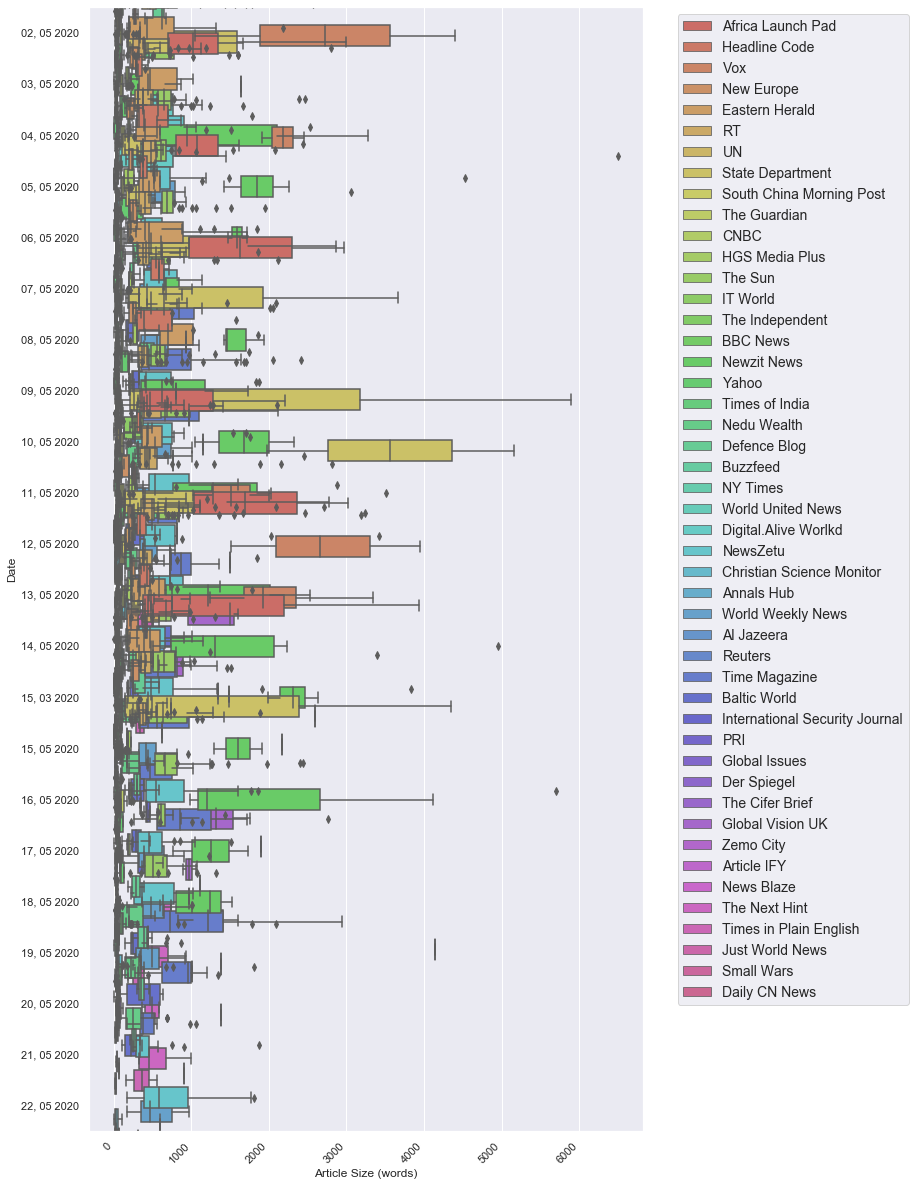

In [112]:
%%time
importlib.reload(reader)
summarizeByDate(allDict)

### Overview of Article Authors

For the purpose of plotting the articles a Python library called "seaborn" was used, also in order to create a certain uniformity in displaying plots.

In [7]:
#importlib.import_module("samples.seabornScatterPlots") # TODO move to base directory, not samples
%aimport samples.seabornScatterPlots 
from samples.seabornScatterPlots import displayTopics,displayAuthors,displayTags

In the data that was analysed there have been a significant amount of articles without authors. As can be viewed in the plot below there are a significant amount of articles that have as an author more general descriptions, such as "admin" or "author". 

Often news sources also refer directly to news agencies being authors of articles like "Associated Press" and "Agence France-Presse" and "Reuters" or even the Russian News Network "RN", indicating a higher transparency where their news is from.

Some feeds have their own notation, which due to time constraint and importance of this issue when interpreting articles, were not converted most notably, "&#124;" which consists of the "&#" and "124" with ";" resulting in the mark up language "EP&#124;NE" meaning that the article has the two authors EP and NE (who the people behind the abbreviations are is not disclosed).

In [3]:
displayAuthors(dict=allDict)

NameError: name 'displayAuthors' is not defined

### Tags Specified by the Feed Publishers

Below two seaborn plots are displayed concerning the tags that were used by news articles. Tags are frequently used when people are searching for news articles. As such they usually are more general in nature and should be able to be provide a source in order to group articles. As displayed below there are however still a few different descriptions of tags referring to the same topics. 

A prime example of how different tags refer to the same talking point is the corona virus pandemic, tags "COVID-19", "Covid-19 Pandemic", "Coronavirus outbreak" and "Coronavirus" all refer to the same topic.

It also has to be noted here as the articles were collected in the timespan of the 2nd to the 22nd of May 2020 the world has been gripped by the corona virus pandemic. And as such the tag usage in the feeds in the plot below shows very big bubble denoting the importance of the virus. It also has to be mentioned that the pandemic has influenced wide varieties of news and as such covid has been mentioned a lot in combination with other tags, further increasing its usage.

Some news providers also use tags more in general such as The Guardian using in general more tags than for instance Daily CN News.

In the code below it has been specified to show the 20 most common tags, this is a parameter that can be adjusted to display more or less by the reader. Additionally, the data refers to "allDict", which is the dictionary of collected articles that are used in the analysis of this project. This of course can be changed to for instance an own dictionary provided by the reader.

From allDocDict how many of the specified tags occur is calculated for each FeedItem of the named feeds in feedTagMatrix, summing them in the x.y position (Feed, Tagname) in the given matrix below.


There were 3736 articles with tags and 5442 without tags


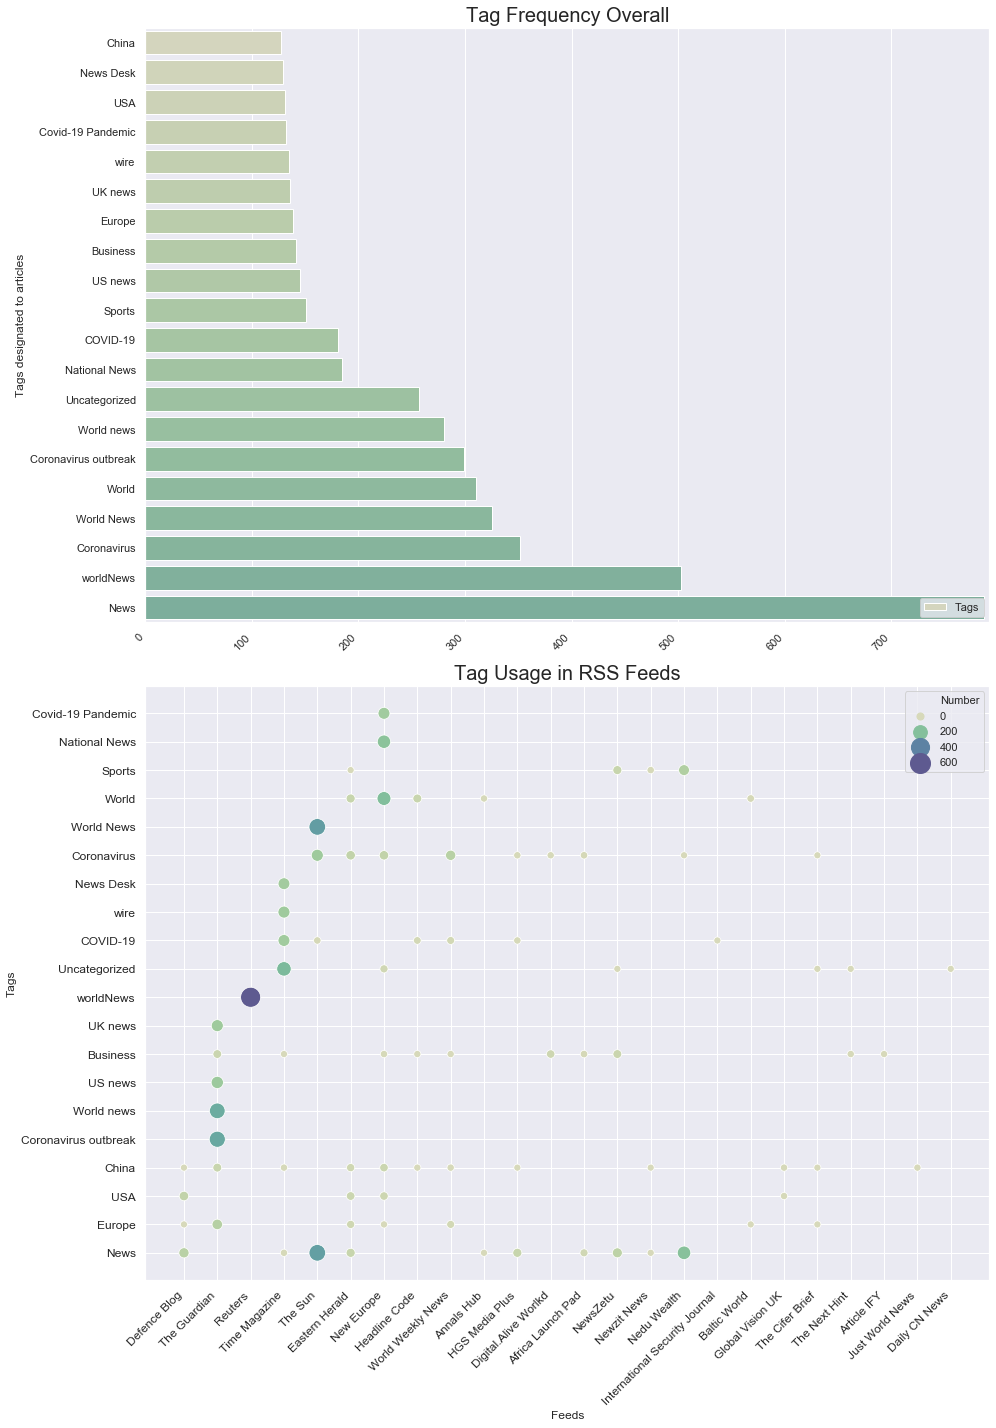

In [205]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(8,10))
#allDict=loadAllFeedsFromFile()
%aimport samples.seabornScatterPlots
importlib.reload(reader)
importlib.reload(samples.seabornScatterPlots)
from samples.seabornScatterPlots import displayTags
displayTags(allDict, displayAmount=20)

## Identifying Topics within the Articles

In [222]:
#importlib.import_module("topicmap")
%aimport topicmap
importlib.reload(topicmap)
from topicmap import displayTopicsAndFeeds,getDocList, getAllTopics,getCustomStopWords, deriveTopicMaps, updateDictionaryByFuzzyRelevanceofTopics
from topicmap import doStandardInitialize,getAllFeedTopics

In the next piece of code the docContentList is defined by the "allDict" (i.e. the collected articles put into a dictionary) and the "stop_list". Both of these elements can be changed for individual purposes. The stop_list refers to an individual list of custom stop words. Stop_list refers to the expressions (stop words and phrases) that need to be ignored in addition to the nltk.corpus stoplist for English. NLTK ( Natural Language Toolkit) is another Python library that was used in the analysis for tokenization, stemming, tagging, parsing, and semantic reasoning. An example of a stop phrase that was manually added would be "view entire post", which is not related to the content and occurs often enough that it cannot be manually deleted from the analysed content. 


With added Lemmatization, the given number of "Topics" through maxNum is derived from the supplied sentences. The implicit use of TfidfTransformer additionally scales down the impact of tokens that occur very frequently in the given corpus and that are hence empirically less informative than features occuring in a small fraction of the corpus. 


In [214]:
%%time
docContentList=getDocList(allDict, reloaddocs=False,stop_list=getCustomStopWords())
topics= deriveTopicMaps(docContentList, maxNum=40, ngram_range=(3,3))

The Function updateDictionaryByFuzzyRelevanceofTopics:

Adds list of topics to each entry of the given allEntryDict for each topic that has a fuzzy relevance of greater than the specified threshold, which can be changed here, as required.
The fuzzy string comparison that was applied here analyses similar instances of  topics thus reducing the amount of topics that are analysed and ultimately displayed below. 

For the purpose of the fuzzy string comparison a python package named "fuzzywuzzy.python" was installed.


There were 1697 items with topics and 0 without topics


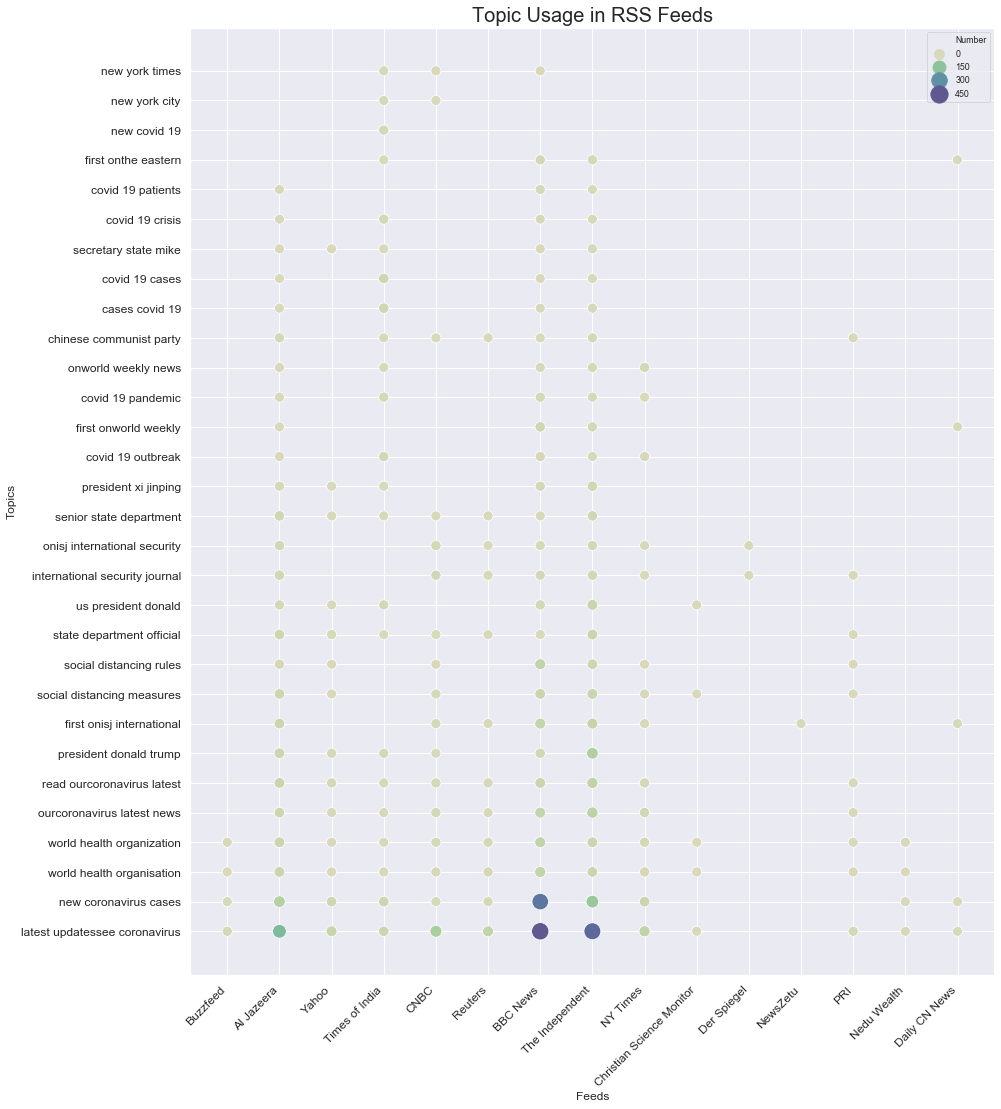

In [225]:
%%time
updateDictionaryByFuzzyRelevanceofTopics(topics,allDict, limit=None, threshold=60, remove=True)
displayTopicsAndFeeds(allDict, numTopics=30)

The scatter plot up above describes the detected topics for each feed. As can be viewed above particularly the topics "new coronavirus cases" and "latest updates see coronavirus" refer to the corona virus pandemic. As was already detected in the tags in a previous section, the corona virus has overwhelmingly dominated the news in the analysed month of May. Particularly classical news feeds of BBC News and The Independent, which update their feeds often as opposed to Der Spiegel that usually posts more editorial pieces post about the latest updates regarding the pandemic.   

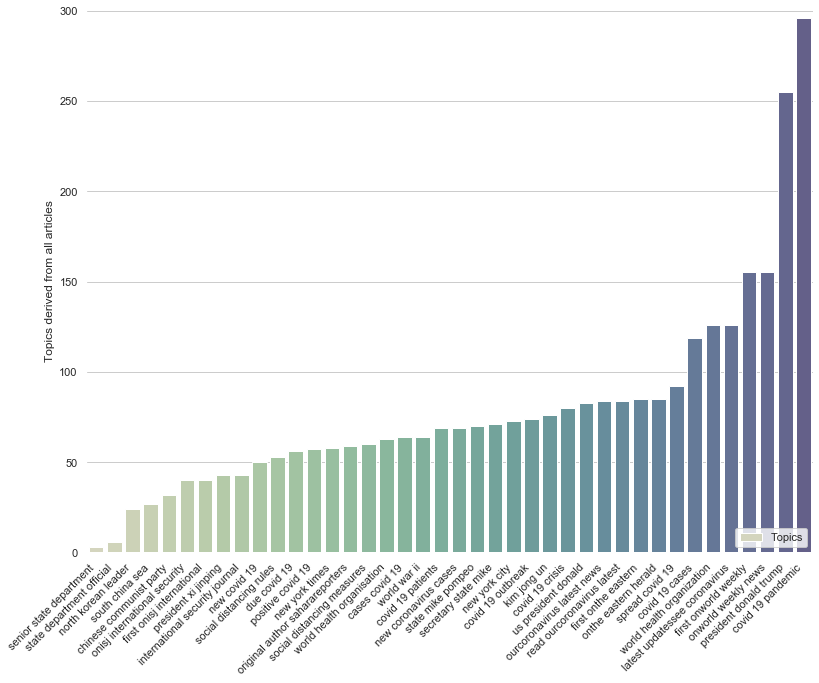

In [226]:
displayTopics(topics)

Clearly the overwhelmingly most prevalent topic (in May 2020) is the coronavirus pandemic (Covid-19). Not only as the main story of the day (and of the month and year), but also spurning dozens of other sub-stories emanating from the Covid-19 crisis. World War II is also mentioned as part of the topics, as this year marks the 75 anniversary on May 7 that Germany had signed the unconditional surrender marking the end of the war. Kim Jong Un was also derived as a separate topic since he missed his grandfather's birthday celebration (April 15th) and had not been seen in public for an extended period of time and has then reappeared in May 2020. These events have to be accounted for when analysing the the most recent news feed articles.  

## Using Soft Cosine Similarity to Cluster Stories

In the 3D scatter plot map below a similarity matrix is displayed. In order to do so the documents are collected from a file (which can be specified), a list of titles+content is taken as the basis to calculate 40 (in this case) topics using 3 to 4 n-grams. This can also be specified by the reader however 3 to 4 N-grams have found for this purpose to be the best in order to provide more context (e.g. "Korea" by its own is not enough to know if the news concerns "North Korea" or "South Korea" and why the country is mentioned).
The topics are then mapped and a list of topics is added to each entry of the given allEntryDict for each topic that has an LDA fuzzy relevance (see fuzzywuzzy process) of greater than the specified threshold.

The  SoftCosine-Similarity matrix is then calculated with WordEmbeddings fasttext_model300 (dimension 300) or alternatively GloVe (dimension 50). The first call for "fasttext" includes a download of ca. 1GB of data, which takes ca. 30 minutes, subsequent calls load this from disk, which also takes 2-3 minutes. Alternatively, the first call for "GloVe (w2v_model)" includes a download of ca. 60MB of data, which takes ca. 3 minutes, subsequent calls load this from disk which also takes 30 seconds. Thus. time to load this should be calculated when deciding to calculate the SoftCosine-Similarity matrix with a dimension of 300 or 50. 

The matrix is subsequently saved to file. A spectral analysis and dimension reduction (using the PCA method) is used on similarity matrix. Different methods of dimension reduction are also available, such as LDA, which is used below to show an alternative way. The matrix is then presented using plotScatter3D with tool tips.

Tool tips is an HTML string for displaying the RSS-entry infos, currently title, feedname, date of publication and author. What is displayed can be adjusted in the code according to what is required by the reader.

The sizes of the spheres in the plot are scaled to the degree of cosine similarity for the article in relation to the cluster.

In [227]:
%aimport Gensim.gensim_test
importlib.reload(Gensim.gensim_test)
from Gensim.gensim_test import deriveSoftCosineSimilarityMatrix,test3DPlotOfCosineSimilarity ,showPyLDAvis, saveDFPickle

In [ ]:
%%time
matrix=deriveSoftCosineSimilarityMatrix(allDict)
saveDFPickle(matrix) # TODO remove or make saved result more useful (reusable)

Now that the similarity matrix has been calculated it is very quick and easy to produce additional plots. For instance with a higher threshold, thus filtering out less significant articles or specifying a different number of topics to color-code.

In [103]:
test3DPlotOfCosineSimilarity(allDict,matrix=matrix,numTopics=20, threshold=0.6)

In [162]:
importlib.reload(Gensim.gensim_test)
test3DPlotOfCosineSimilarity(allDict,matrix=matrix,numTopics=20, threshold=0.65)

200522150544665 not found
200522143909314 not found


### LDA Analysis with the pyLDAvis Visualization

As was explained previously, there are different techniques available to generate the topics that are displayed. One option that is touched upon here is LDA or Latent Dirichlet Algorithm. LDA accounts for (as opposed to a Bag of Words approach) the interchangeability of words and strings. LDAvis as used below is a technique of interactively visualising multiple dimensions. The package is imported from the gensim library.

The most relevvant terms are displayed below. Moving the cursor over one of the terms shows the conditional distribution of the topic. Again the reader is able to specify the numTopics and the allDict that are used. 

In [4]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
output_notebook()

NameError: name 'output_notebook' is not defined

In [206]:
%%time
importlib.reload(reader)
importlib.reload(Gensim.gensim_test)
from topicmap import smallDict
showPyLDAvis(smallDict(allDict,200), numTopics=10)


Wall time: 5min 44s
